In [9]:
import cmocean.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

from salishsea_tools import viz_tools

%matplotlib inline

To do the daily average on the hourly 5 day files:  
ncra -d time_counter,96,119 infile outfile

In [12]:
tmask = xr.open_dataset('/Users/sallen/Documents/MEOPAR/grid/mesh_mask201702.nc').tmask

## Daily Means, June 18, 2020

In [145]:
gridT = xr.open_dataset('/Users/sallen/Documents/MEOPAR/Results/SalishSea_1d_20200618_20200618_grid_T.nc')
gridU = xr.open_dataset('/Users/sallen/Documents/MEOPAR/Results/SalishSea_1d_20200618_20200618_grid_U.nc')
gridV = xr.open_dataset('/Users/sallen/Documents/MEOPAR/Results/SalishSea_1d_20200618_20200618_grid_V.nc')
h_gridT = xr.open_dataset('/Users/sallen/Documents/MEOPAR/Results/hindcast_1d_20200618_20200618_grid_T.nc')
h_gridU = xr.open_dataset('/Users/sallen/Documents/MEOPAR/Results/hindcast_1d_20200618_20200618_grid_U.nc')
h_gridV = xr.open_dataset('/Users/sallen/Documents/MEOPAR/Results/hindcast_1d_20200618_20200618_grid_V.nc')
x_gridT = xr.open_dataset('/Users/sallen/Documents/MEOPAR/Results/noXfric_1d_20200618_20200618_grid_T.nc')
x_gridU = xr.open_dataset('/Users/sallen/Documents/MEOPAR/Results/noXfric_1d_20200618_20200618_grid_U.nc')
x_gridV = xr.open_dataset('/Users/sallen/Documents/MEOPAR/Results/noXfric_1d_20200618_20200618_grid_V.nc')
t_gridT = xr.open_dataset('/Users/sallen/Documents/MEOPAR/Results/tmask_1d_20200618_20200618_grid_T.nc')
t_gridU = xr.open_dataset('/Users/sallen/Documents/MEOPAR/Results/tmask_1d_20200618_20200618_grid_U.nc')
t_gridV = xr.open_dataset('/Users/sallen/Documents/MEOPAR/Results/tmask_1d_20200618_20200618_grid_V.nc')
Uvel = viz_tools.unstagger_xarray(gridU.vozocrtx, 'x')
Vvel = viz_tools.unstagger_xarray(gridV.vomecrty, 'y')
h_Uvel = viz_tools.unstagger_xarray(h_gridU.vozocrtx, 'x')
h_Vvel = viz_tools.unstagger_xarray(h_gridV.vomecrty, 'y')
x_Uvel = viz_tools.unstagger_xarray(x_gridU.vozocrtx, 'x')
x_Vvel = viz_tools.unstagger_xarray(x_gridV.vomecrty, 'y')
t_Uvel = viz_tools.unstagger_xarray(t_gridU.vozocrtx, 'x')
t_Vvel = viz_tools.unstagger_xarray(t_gridV.vomecrty, 'y')

In [167]:
def plot_row(fig, axs, gridT, Uvel, Vvel, gridU, gridV, tmask, run_title, diffy=False):
    hour = 0
    imin, imax = 405, 445
    jmin, jmax = 280, 320
    skip = 1
    if diffy:
        cmap = cm.curl
        cmap2 = cm.curl
        vmax = 2
        vmin = -2
        vmax2 = vmax
        vmin2 = vmin
        vmax3 = 0.1
        vmin3 = -0.1
        vmax4 = vmax3
        vmin4 = vmin3
    else:
        cmap = cm.haline
        cmap2 = cm.speed
        vmax = 10
        vmin = 0
        vmax2 = 20
        vmin2 = 5
        vmax3 = 0
        vmin3 = -1
        vmax4 = 0.6
        vmin4 = -0.4
    colour = axs[0].pcolormesh(gridT.vosaline[hour, 0:3, imin:imax, jmin:jmax].mean(axis=0), 
                                 cmap=cmap, vmax=vmax, vmin=vmin)
    axs[0].contourf(tmask[0, 0, imin:imax, jmin:jmax+1], [-0.01, 0.01], colors='burlywood')
    fig.colorbar(colour, ax=axs[0])
    axs[0].set_title(f"{run_title}:\n 0-3 m Salinity")
    pU, pV = (np.ma.masked_array(Uvel[hour, 0, imin:imax:skip, jmin:jmax:skip], 
                                 mask=1-tmask[0, 0, imin:imax:skip, jmin:jmax:skip]),
              np.ma.masked_array(Vvel[hour, 0, imin:imax:skip, jmin:jmax:skip], 
                                 mask=1-tmask[0, 0, imin:imax:skip, jmin:jmax:skip])
                                )
    speeds = np.sqrt(np.square(pU) + np.square(pV))
    quiver = axs[1].quiver(pU, pV, speeds, cmap=cm.amp, pivot='mid', width=0.005)
    print (speeds.max())
    axs[1].quiverkey(quiver, 20, 2, -1, '1 m/s', coordinates='data', color='blue', labelcolor='blue')
    axs[1].contourf(tmask[0, 0, imin:imax, jmin:jmax], [-0.01, 0.01], colors='burlywood')
    axs[1].set_title("Surface Velocity")
    
    imin, imax = 385, 485
    jmin, jmax = 240, 320

    colour = axs[2].pcolormesh(gridT.vosaline[hour, 0:3, imin:imax, jmin:jmax].mean(axis=0), 
                                 cmap=cmap, vmin=vmin2, vmax=vmax2 )
    fig.colorbar(colour, ax=axs[2])
    axs[2].set_title("Larger View, Surface Salinity")
    
    colour = axs[3].pcolormesh(gridU.vozocrtx[hour, 0:3, imin:imax, jmin:jmax].mean(axis=0), 
                                 cmap=cmap2, vmax=vmax3, vmin=vmin3)
    fig.colorbar(colour, ax=axs[3])
    axs[3].set_title("Larger View, Cross-Strait Velocity")
    
    colour = axs[4].pcolormesh(gridV.vomecrty[hour, 0:3, imin:imax, jmin:jmax].mean(axis=0), 
                                 cmap=cmap2, vmax=vmax4, vmin=vmin4)
    fig.colorbar(colour, ax=axs[4])
    axs[4].set_title("Larger View, Along-Strait Velocity")

    
    for ax in axs:
        viz_tools.set_aspect(ax);


0.9630901
0.982924
0.12808163
0.9961948
0.19832207
0.97830856
0.16706687


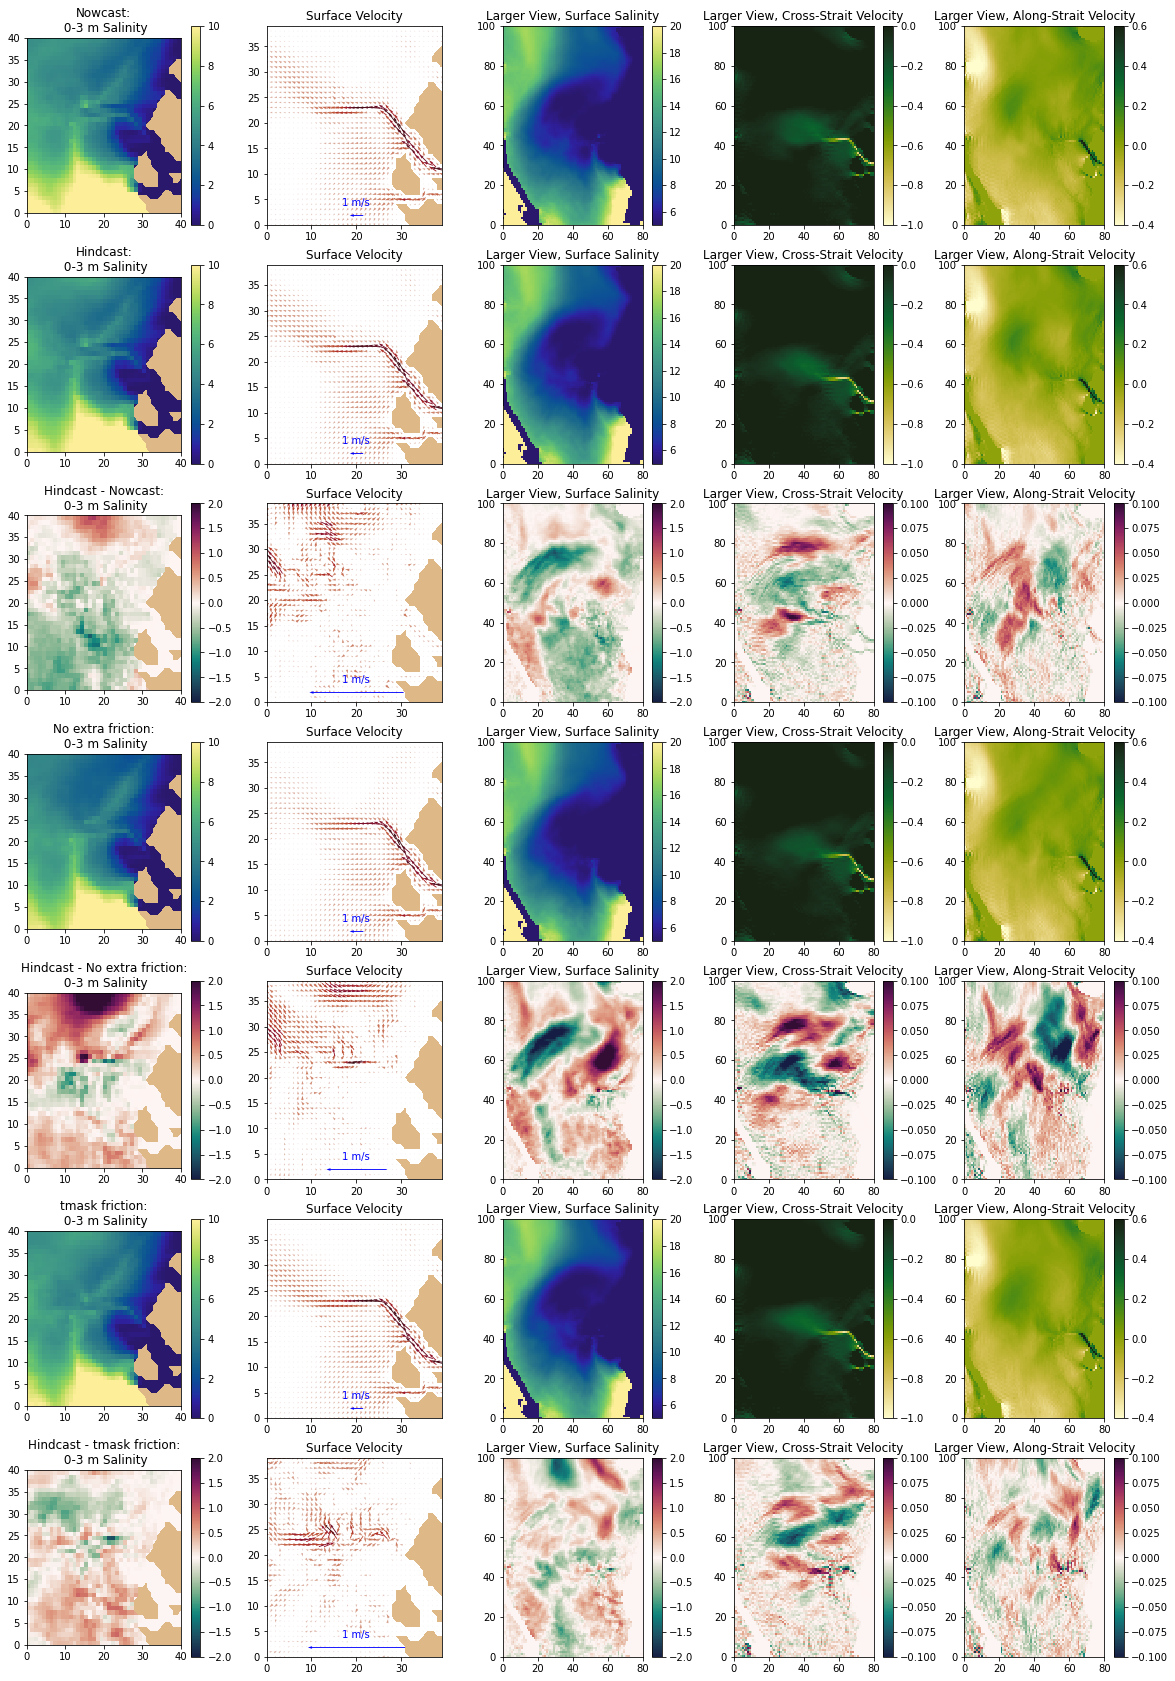

In [169]:
fig, axs = plt.subplots(7, 5, figsize=(20, 30))
plot_row(fig, axs[0], gridT, Uvel, Vvel, gridU, gridV, tmask, 'Nowcast')
plot_row(fig, axs[1], h_gridT, h_Uvel, h_Vvel, h_gridU, h_gridV, tmask, 'Hindcast')
plot_row(fig, axs[2], h_gridT - gridT, h_Uvel - Uvel, h_Vvel - Vvel, h_gridU-gridU, h_gridV-gridV, 
         tmask, 'Hindcast - Nowcast', diffy=True)
plot_row(fig, axs[3], x_gridT, x_Uvel, x_Vvel, x_gridU, x_gridV, tmask, 'No extra friction')
plot_row(fig, axs[4], h_gridT - x_gridT, h_Uvel - x_Uvel, h_Vvel - x_Vvel, h_gridU-x_gridU, h_gridV-x_gridV,
         tmask, 'Hindcast - No extra friction', diffy=True)
plot_row(fig, axs[5], t_gridT, t_Uvel, t_Vvel, t_gridU, t_gridV, tmask, 'tmask friction')
plot_row(fig, axs[6], h_gridT - t_gridT, h_Uvel - t_Uvel, h_Vvel - t_Vvel, h_gridU-t_gridU, h_gridV-t_gridV,
         tmask, 'Hindcast - tmask friction', diffy=True)

<b>What I like in these figures</b>  
On the right, the flow out of the main arm is strong, and makes the turn at the kink in the jetty.  Some leakage through the jetty.  On the left we see a separation of the freshwater between the main arm and the middle arm to the north, again showing weak leakage to the north.  
Looking at the no-friction case we see a general spreading of the flow, and the freshwater stays close to the coast.  
Looking at the tmask friction case, this is much less of an issue.  Only the north end of the plume is significantly different.

## Larger, Surface Velocity Pictures

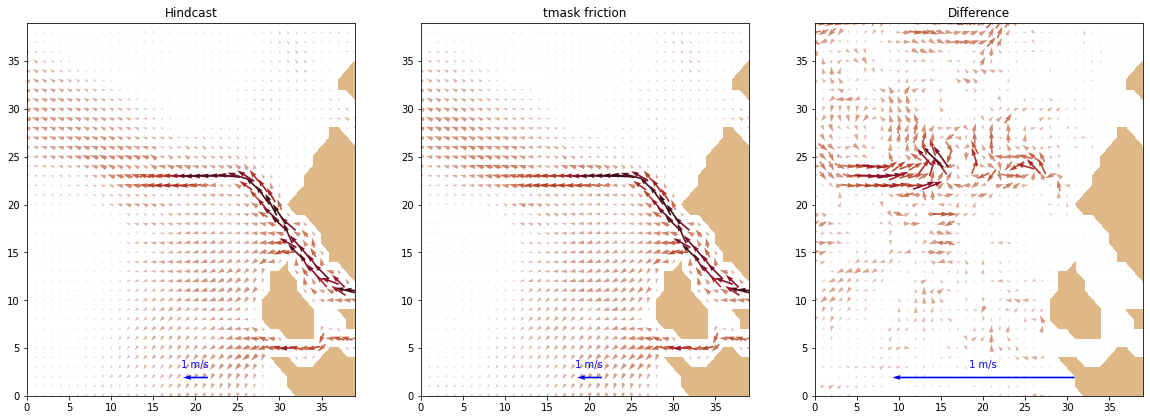

In [175]:
hour = 18
imin, imax = 405, 445
jmin, jmax = 280, 320
skip = 1
fig, axs = plt.subplots(1, 3, figsize=(20, 8))

pU, pV = (np.ma.masked_array(h_Uvel[0, 0, imin:imax:skip, jmin:jmax:skip], 
                                 mask=1-tmask[0, 0, imin:imax:skip, jmin:jmax:skip]),
              np.ma.masked_array(h_Vvel[0, 0, imin:imax:skip, jmin:jmax:skip], 
                                 mask=1-tmask[0, 0, imin:imax:skip, jmin:jmax:skip])
                                )
speeds = np.sqrt(np.square(pU) + np.square(pV))
quiver = axs[0].quiver(pU, pV, speeds, cmap=cm.amp, pivot='mid', width=0.005)
axs[0].quiverkey(quiver, 20, 2, -1, '1 m/s', coordinates='data', color='blue', labelcolor='blue')
axs[0].contourf(tmask[0, 0, imin:imax, jmin:jmax], [-0.01, 0.01], colors='burlywood')
axs[0].set_title('Hindcast')

pU, pV = (np.ma.masked_array(t_Uvel[0, 0, imin:imax:skip, jmin:jmax:skip], 
                                 mask=1-tmask[0, 0, imin:imax:skip, jmin:jmax:skip]),
              np.ma.masked_array(t_Vvel[0, 0, imin:imax:skip, jmin:jmax:skip], 
                                 mask=1-tmask[0, 0, imin:imax:skip, jmin:jmax:skip])
                                )
speeds = np.sqrt(np.square(pU) + np.square(pV))
quiver = axs[1].quiver(pU, pV, speeds, cmap=cm.amp, pivot='mid', width=0.005)
axs[1].quiverkey(quiver, 20, 2, -1, '1 m/s', coordinates='data', color='blue', labelcolor='blue')
axs[1].contourf(tmask[0, 0, imin:imax, jmin:jmax], [-0.01, 0.01], colors='burlywood')
axs[1].set_title('tmask friction')

pU, pV = (np.ma.masked_array(h_Uvel[0, 0, imin:imax:skip, jmin:jmax:skip]-t_Uvel[0, 0, imin:imax:skip, jmin:jmax:skip], 
                                 mask=1-tmask[0, 0, imin:imax:skip, jmin:jmax:skip]),
              np.ma.masked_array(h_Vvel[0, 0, imin:imax:skip, jmin:jmax:skip]-t_Vvel[0, 0, imin:imax:skip, jmin:jmax:skip], 
                                 mask=1-tmask[0, 0, imin:imax:skip, jmin:jmax:skip])
                                )
speeds = np.sqrt(np.square(pU) + np.square(pV))
quiver = axs[2].quiver(pU, pV, speeds, cmap=cm.amp, pivot='mid', width=0.005)
axs[2].quiverkey(quiver, 20, 2, -1, '1 m/s', coordinates='data', color='blue', labelcolor='blue')
axs[2].contourf(tmask[0, 0, imin:imax, jmin:jmax], [-0.01, 0.01], colors='burlywood')
axs[2].set_title('Difference')

for ax in axs:
    viz_tools.set_aspect(ax);

<b>What I see in these figures</b>  
Here we focus on the difference between the tmask friction and the hindcast.  The differences are subtle.  With the hindcast, we see more leakage through the jetty, particularly towards the end of it.  This means the tidal jet does not bend as much to the north and goes a little further offshore.  However, looking above, this does not translate to the freshwater plume going further offshore in this case.